In [1]:
import librosa
import numpy as np
import librosa.display
from IPython.display import Audio
import matplotlib.pyplot as plt

c:\Users\agarw\anaconda3\envs\MasterEnv\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\agarw\anaconda3\envs\MasterEnv\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
c:\Users\agarw\anaconda3\envs\MasterEnv\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
pwd

'c:\\D_drive\\Practise\\Audio'

In [2]:
y, sr = librosa.load('sample_audio.wav')

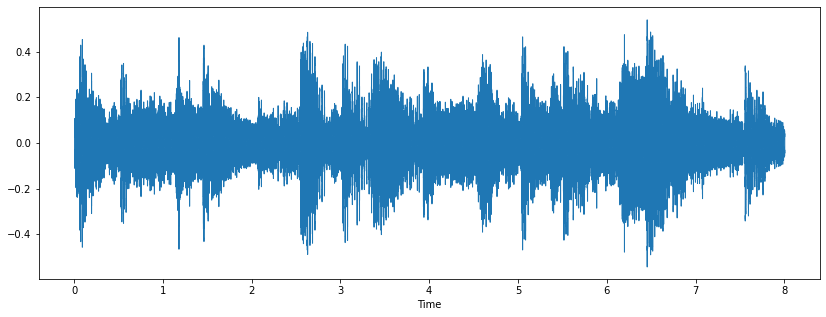

In [3]:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)

# Zero Crosssing Rate
1. It is defined as the number of times a signal varies from +ve to 0 to -ve  or  -ve to 0 to +ve
2. This is used in speech recognition and MIR.
3. This can be used for pitch detection for monophonic toanl signals.
4. Voice activity detection.

In [4]:
Audio(y, rate=sr)

In [5]:
zcr = librosa.feature.zero_crossing_rate(y, frame_length=1024,hop_length=512)
zcr.shape

(1, 345)

(345,)


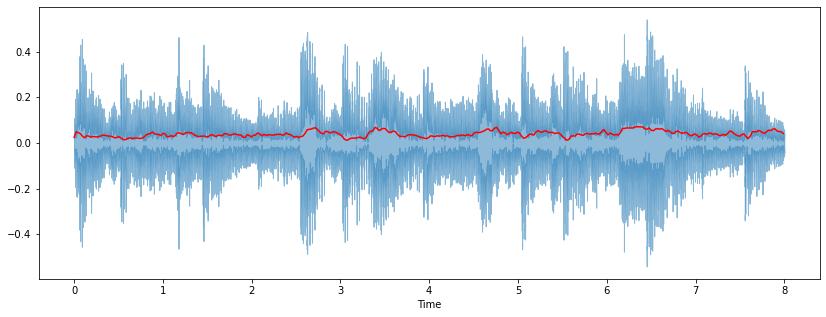

In [13]:
frames = range(len(zcr[0]))
t = librosa.frames_to_time(frames, hop_length=512)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, alpha=0.5)
plt.plot(t,zcr[0],color="r")

In [14]:
print(sum(zcr[0])/len(zcr[0]))

0.03898041213768116
